# Monthly Financial Data

I hope to recreate the Monthly Financial Charts/Data from Excel into Python to make it easier to compute.

Data: MW Donations, GF Balance, MW Expense Budget, Expenses

In [77]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re, math
import os
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

path_to_data = '/Users/johnmillstead/coding/excel_to_python/'


## Load Financial Data

In [78]:
monthly = pd.read_csv(path_to_data + 'monthlyfincdata.csv')

In [79]:
monthly.head()

,date,donations,balance,expenses,budget
0,1/31/07,61114.0,0.0,0.0,0.0
1,2/28/07,45396.0,0.0,0.0,0.0
2,3/31/07,103391.0,0.0,0.0,0.0
3,4/30/07,111459.0,0.0,0.0,0.0
4,5/31/07,55401.0,0.0,0.0,0.0


In [80]:
monthly.describe()

,donations,balance,expenses,budget
count,167.000000,167.000000,167.000000,180.000000
mean,130586.808383,69455.257485,10428.787725,82437.205556
std,70551.210624,41874.678080,9750.292319,65771.355078
min,45396.000000,0.000000,0.000000,0.000000
25%,79141.000000,54302.500000,0.000000,55835.250000
50%,111459.000000,81348.000000,12863.530000,84099.000000
75%,156489.000000,93037.500000,19177.445000,98567.500000
max,521005.000000,169878.000000,29695.620000,315400.000000


In [81]:
monthly.dtypes

date          object
donations    float64
balance      float64
expenses     float64
budget       float64
dtype: object

In [82]:
monthly['date'] = pd.to_datetime(monthly['date'])

In [83]:
monthly.set_index('date')

,donations,balance,expenses,budget
date,,,,
2007-01-31,61114.0,0.0,0.0,0.0
2007-02-28,45396.0,0.0,0.0,0.0
2007-03-31,103391.0,0.0,0.0,0.0
2007-04-30,111459.0,0.0,0.0,0.0
2007-05-31,55401.0,0.0,0.0,0.0
...,...,...,...,...
2021-08-31,NaN,NaN,NaN,288519.0
2021-09-30,NaN,NaN,NaN,275204.0
2021-10-31,NaN,NaN,NaN,288690.0


In [84]:
monthly.dtypes

date         datetime64[ns]
donations           float64
balance             float64
expenses            float64
budget              float64
dtype: object

In [85]:
print(np.min(monthly['date']), np.max(monthly['date']))

2007-01-31 00:00:00 2021-12-31 00:00:00


In [86]:
monthly = monthly.sort_values('date', ascending=True)

In [90]:
monthly.head()

,date,donations,balance,expenses,budget,expenseSMA3
0,2007-01-31,61114.0,0.0,0.0,0.0,NaN
1,2007-02-28,45396.0,0.0,0.0,0.0,NaN
2,2007-03-31,103391.0,0.0,0.0,0.0,0.0
3,2007-04-30,111459.0,0.0,0.0,0.0,0.0
4,2007-05-31,55401.0,0.0,0.0,0.0,0.0


In [91]:
monthly.columns.get_loc("expenses")

3

In [92]:
monthly['expenseSMA3'] = monthly.iloc[:,3].rolling(window=3).mean().round(0)

In [93]:
monthly['reserves']=monthly['balance']/monthly['expenseSMA3']

In [61]:
monthly.head(50)

,date,donations,balance,expenses,budget,expenseSMA3,reserves
0,2007-01-31,NaN,0.0,0.0,0.0,NaN,NaN
1,2007-02-28,NaN,0.0,0.0,0.0,NaN,NaN
2,2007-03-31,NaN,0.0,0.0,0.0,0.0,NaN
3,2007-04-30,NaN,0.0,0.0,0.0,0.0,NaN
4,2007-05-31,NaN,0.0,0.0,0.0,0.0,NaN
5,2007-06-30,NaN,0.0,0.0,0.0,0.0,NaN
6,2007-07-31,NaN,0.0,0.0,0.0,0.0,NaN
7,2007-08-31,NaN,0.0,0.0,0.0,0.0,NaN
8,2007-09-30,NaN,0.0,0.0,0.0,0.0,NaN
9,2007-10-31,NaN,0.0,0.0,0.0,0.0,NaN


In [94]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         180 non-null    datetime64[ns]
 1   donations    167 non-null    float64       
 2   balance      167 non-null    float64       
 3   expenses     167 non-null    float64       
 4   budget       180 non-null    float64       
 5   expenseSMA3  165 non-null    float64       
 6   reserves     131 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.2 KB


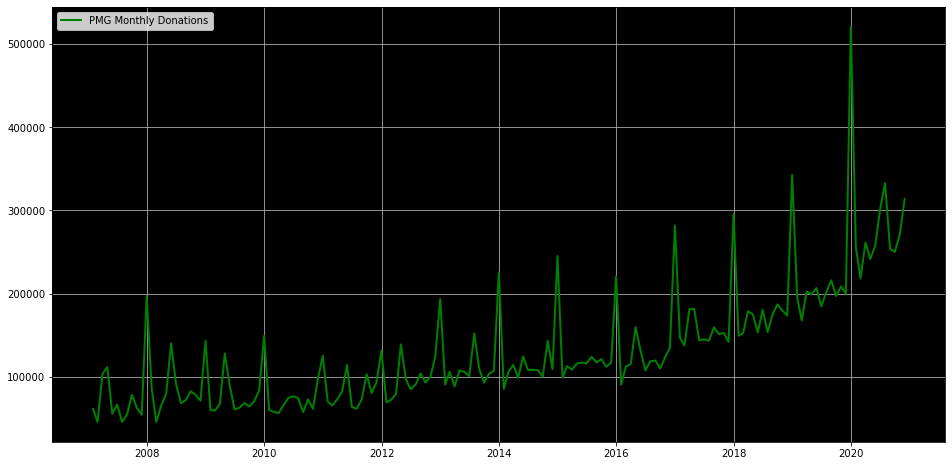

In [96]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('xkcd:black')
plt.plot(monthly['date'],
	monthly['donations'],
	color='green',
	linewidth=2,
	label='PMG Monthly Donations')
plt.grid()
plt.legend(loc ='upper left')

#### test output

In [97]:
monthly.to_csv('finctest.csv', index=False)

In [99]:
single_date=monthly[monthly['date']=="2018-03-31"]

In [100]:
print(single_date)

          date  donations  balance  expenses   budget  expenseSMA3  reserves
134 2018-03-31   178641.0  98962.0  19178.49  83303.0      18714.0  5.288127
